In [1]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys

# Moises Path

#windows path
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

# #linux path
# sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
# import lumapi
# sys.path.append(os.path.dirname('/home/moises/Downloads/'))

# Leonardo Path

###############################################################
#LINUX PATH

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/media/leonardo/datam02/')) #Current directory

###############################################################
#WINDOWS PATH

# spec_win = imp.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
# lumapi = imp.util.module_from_spec(spec_win)
# os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
# sys.path.append(os.path.dirname('C:/Users/Léo/Documents/Facul/Capacitação/GitHub/2x4MMI_Hybrid'))
# spec_win.loader.exec_module(lumapi)

/tmp/ipykernel_3037/1413489147.py:11: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [3]:
fdtd = lumapi.FDTD(filename = '../CML/Hybrid.fsp')

## parameters

In [2]:
core = 'GaInAsP'
cladding = 'InP - Palik'
buffer = 'InP - Palik'
substrate = 'InP - Palik'
n = 3.2515 ## refractive index of GaInAsP for 1.55 um
w = 2e-6
thickness = 0.3e-6
Wmf = 18.6e-6
Wms = 9.02e-6
Ldevice = 227e-6
LS24 = 116e-6
LM22 = 111e-6
gap = 1.1e-6
c = 299792458
xspan = 10e-6
yspan = 5e-6
v = c/n
z_span_cladding = 2e-6
z_span_buffer = 1.2e-6
z_span_substrate = 5e-6

In [7]:
fdtd.selectall()
fdtd.delete()

# Creating MMIs
fdtd.addobject('linear_taper') # Add MMI 2x4 Box
fdtd.set({
    'name':'2X4',
    'x':0,
    'y':0,
    'z':0,
    'thickness':thickness,
    'angle_side':90,
    'width_l':Wms,
    'width_r':Wmf,
    'len':LS24,
    'material':core
})

fdtd.addobject('linear_taper') # Add MMI 2x4 buffer layer
fdtd.set({
    'name':'substrate_MMI_2x4',
    'x':0,
    'y':0,
    'z':-thickness/2 - z_span_buffer/2,
    'thickness':z_span_buffer,
    'angle_side':90,
    'width_l':Wms,
    'width_r':Wmf,
    'len':LS24,
    'material':substrate
})

fdtd.addobject('linear_taper') # Add MMI 2x4 cladding
fdtd.set({
    'name':'cladding_MMI_2x4',
    'x':0,
    'y':0,
    'z':thickness/2 + z_span_cladding/2,
    'thickness':z_span_cladding,
    'angle_side':90,
    'width_l':Wms,
    'width_r':Wmf,
    'len':LS24,
    'material':cladding
})

fdtd.addrect() # Add MMI 2x2 Box
fdtd.set({
    'name'     : 'MMI2x2',
    'material' : core,
    'y span'   : Wms,
    'z span'   : thickness,
    'z'        : 0,
    'x min'    : LS24/2,
    'x max'    : LM22 + LS24/2,
    'y'        : -Wmf/4,
    'y span'   : Wms
})

fdtd.addrect() # Add MMI 2x2 buffer layer
fdtd.set({
    'name'     : 'substrate_MMI_2x2',
    'material' : substrate,
    'y span'   : Wms,
    'z span'   : z_span_buffer,
    'z'        : -thickness/2 - z_span_buffer/2,
    'x min'    : LS24/2,
    'x max'    : LM22 + LS24/2,
    'y'        : -Wmf/4,
    'y span'   : Wms
})

fdtd.addrect() # Add MMI 2x2 cladding
fdtd.set({
    'name'     : 'cladding_MMI_2x2',
    'material' : cladding,
    'y span'   : Wms,
    'z span'   : z_span_cladding,
    'z'        : thickness/2 + z_span_cladding/2,
    'x min'    : LS24/2,
    'x max'    : LM22 + LS24/2,
    'y'        : -Wmf/4,
    'y span'   : Wms
})

# Creating input bends 
fdtd.unselectall()
fdtd.addobject('s_bend_wg') # Creating the bend
fdtd.addtogroup('Input Bends') # Adding the bends on the same group
fdtd.set({'name' :'bend up',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :+Wms/6,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') # Creating the bends buffer layers
fdtd.addtogroup('Input Bends') # Adding the bends on the same group
fdtd.set({'name' :'buffer_bend up',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :+Wms/6,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :substrate
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') # Creating the bends buffer claddings
fdtd.addtogroup('Input Bends') # Adding the bends on the same group
fdtd.set({'name' :'cladding_bend up',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :+Wms/6,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Input Bends') 
fdtd.set({'name' :'buffer_bend down',
    'first axis' :'z',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :-Wms/6,
    'z'          :thickness/2 - z_span_buffer/2,
    'base angle' :270,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :substrate
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Input Bends') 
fdtd.set({'name' :'bend down',
    'first axis' :'z',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :-Wms/6,
    'z'          :0,
    'base angle' :270,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})


fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Input Bends') 
fdtd.set({'name' :'cladding_bend down',
    'first axis' :'z',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :-Wms/6,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :270,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

# Creating Input extensions
fdtd.addrect() 
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'rect input up',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':Wms/6,
    'y span':w,
    'z':0,
    'z span':thickness,
})

fdtd.set('material', core)

fdtd.addrect() 
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'cladding rect input up',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':Wms/6,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})

fdtd.set('material', cladding)

fdtd.addrect() 
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'buffer rect input up',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':Wms/6,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})

fdtd.set('material', substrate)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'rect input down',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':-Wms/6,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'cladding rect input down',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':-Wms/6,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'buffer rect input down',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':-Wms/6,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', substrate)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'rect bend up',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':Wms/6 + yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'cladding rect bend up',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':Wms/6 + yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'buffer rect bend up',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':Wms/6 + yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', substrate)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'rect bend down',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':-Wms/6 - yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'cladding rect bend down',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':-Wms/6 - yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Input Extensions') 
fdtd.set({
    'name':'buffer rect bend down',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':-Wms/6 - yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})

fdtd.set('material', substrate)

# Creating Output ports

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'port1',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + xspan,
    'y': Wmf/4 + gap/2 + w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'cladding port1',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + xspan,
    'y': Wmf/4 + gap/2 + w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'buffer port1',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + xspan,
    'y': Wmf/4 + gap/2 + w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', substrate)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'port2',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': Wmf/4 - gap/2 - w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'cladding port2',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': Wmf/4 - gap/2 - w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'buffer port2',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': Wmf/4 - gap/2 - w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', substrate)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'port3',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': -Wmf/4 + gap + w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'cladding port3',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': -Wmf/4 + gap + w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'buffer port3',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': -Wmf/4 + gap + w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', substrate)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'port4',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + xspan,
    'y': -Wmf/4 - gap - w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'cladding port4',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + xspan,
    'y': -Wmf/4 - gap - w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Ports') 
fdtd.set({
    'name':'buffer port4',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + xspan,
    'y': -Wmf/4 - gap - w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', substrate)

# Creating output bends 
fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'bend1',
    'first axis' :'z',
    'rotation 1' :0,
    'x span': xspan,
    'x': LS24/2 + LM22 + xspan,
    'y'          :Wmf/4 + gap/2 + w/2,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'y span'     :2*yspan,
    'base height':thickness,
    'material'   :core
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'cladding bend1',
    'first axis' :'z',
    'rotation 1' :0,
    'x span': xspan,
    'x': LS24/2 + LM22 + xspan,
    'y'          :Wmf/4 + gap/2 + w/2,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :2*yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'buffer bend1',
    'first axis' :'z',
    'rotation 1' :0,
    'x span': xspan,
    'x': LS24/2 + LM22 + xspan,
    'y'          :Wmf/4 + gap/2 + w/2,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :2*yspan,
    'base height':z_span_buffer,
    'material'   :buffer
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'bend2',
    'first axis' :'z',
    'rotation 1' :0,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :Wmf/4 - gap/2 - w/2,
    'z'          :0,
    'base angle' :180,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'cladding bend2',
    'first axis' :'z',
    'rotation 1' :0,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :Wmf/4 - gap/2 - w/2,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :180,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'buffer bend2',
    'first axis' :'z',
    'rotation 1' :0,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :Wmf/4 - gap/2 - w/2,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :180,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :substrate
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'bend3',
    'first axis' :'y',
    'rotation 1' :180,
    'x span': xspan,
    'x': LS24/2 + LM22 + 3*xspan,
    'y'          :-Wmf/4 + gap + w/2 - yspan,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'cladding bend3',
    'first axis' :'y',
    'rotation 1' :180,
    'x span': xspan,
    'x': LS24/2 + LM22 + 3*xspan,
    'y'          :-Wmf/4 + gap + w/2 - yspan,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'buffer bend3',
    'first axis' :'y',
    'rotation 1' :180,
    'x span': xspan,
    'x': LS24/2 + LM22 + 3*xspan,
    'y'          :-Wmf/4 + gap + w/2 - yspan,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :buffer
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'bend4',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :-Wmf/4 - gap - w/2 - 2*yspan,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :2*yspan,
    'base height':thickness,
    'material'   :core
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'cladding bend4',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :-Wmf/4 - gap - w/2 - 2*yspan,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :2*yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

fdtd.unselectall()
fdtd.addobject('s_bend_wg') 
fdtd.addtogroup('Output Bends') 
fdtd.set({'name' :'buffer bend4',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :-Wmf/4 - gap - w/2 - 2*yspan,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :2*yspan,
    'base height':z_span_buffer,
    'material'   :buffer
})
# Creating output extensions

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'extension1',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'cladding extension1',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'buffer extension1',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', buffer)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'extension2',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    :Wmf/4 - gap/2 - w/2 + yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'cladding extension2',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    :Wmf/4 - gap/2 - w/2 + yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'buffer extension2',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    :Wmf/4 - gap/2 - w/2 + yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', buffer)

# Creating output extensions

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'extension3',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    : -Wmf/4 + gap + w/2 - yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'cladding extension3',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    : -Wmf/4 + gap + w/2 - yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'buffer extension3',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    : -Wmf/4 + gap + w/2 - yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', buffer)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'extension4',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :-Wmf/4 - gap - w/2 - 2*yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
fdtd.set('material', core)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'cladding extension4',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :-Wmf/4 - gap - w/2 - 2*yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
fdtd.set('material', cladding)

fdtd.addrect()
fdtd.addtogroup('Output Extensions') 
fdtd.set({
    'name':'buffer extension4',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :-Wmf/4 - gap - w/2 - 2*yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
fdtd.set('material', buffer)

# creating the substrate

fdtd.addrect()
fdtd.set({
    'name' :'substrate',
    'x min':-3*xspan - LS24/2 - 10e-6,
    'x max':LS24/2 + LM22 + 4*xspan + 10e-6,
    'y': 0,
    'y span':50e-6,
    'z max':-thickness/2 - z_span_buffer,
    'z min':-thickness/2 - z_span_buffer - z_span_substrate,
    'material':substrate
})



## convergence analysis

In [8]:
simulation_time = (LS24 + 40e-6)/v
zspanfdtd = 5.5e-6
zspanport = 5.5e-6
mesh = 2
fdtd.select('source up')
fdtd.delete()
fdtd.select('source down')
fdtd.delete()
fdtd.select('FDTD')
fdtd.delete()
fdtd.addfdtd()
fdtd.set({
    'mesh accuracy':mesh,
    'x min':-2*xspan - LS24/2 - xspan/2 - 0.5e-6,
    'x max':LS24/2 + 10e-6,
    'y':0,
    'y span':45e-6,
    'z':0,
    'z span':zspanfdtd,
    'simulation time': simulation_time + 500e-15
})

fdtd.addmode()
fdtd.set({
    'name':'source up',
    'x':-2*xspan - LS24/2 - xspan/2,
    'y':Wms/6 + yspan,
    'y span':6e-6,
    'z':0,
    'z span':zspanport
})

fdtd.addmode()
fdtd.set({
    'name':'source down',
    'x':-2*xspan - LS24/2 - xspan/2,
    'y':-Wms/6 - yspan,
    'y span':6e-6,
    'z':0,
    'z span':zspanport
})

fdtd.addport()
fdtd.set({
    'direction':'Backward',
    'x':LS24/2 + xspan/2,
    'y':Wmf/4 - gap/2 - w/2,
    'y span':4e-6,
    'z':0,
    'z span':zspanport
})


MODE Testing


In [11]:
mode = lumapi.MODE(filename = '../CML/hybridMODE.lms')

LumApiError: 'appOpen error: \n Failed to start messaging, check licenses...Insufficient Ansys Lumerical Prep/post processing for MODE solvers licenses available.\nLicensed number of users already reached.\nFeature:       lum_mode_gui\nLicense path:  1055@10.75.13.24:\nFlexNet Licensing error:-4,132.  System Error: 2 "No such file or directory"\n'

In [11]:
mode.selectall()
mode.delete()

# Creating MMIs
mode.addobject('linear_taper') # Add MMI 2x4 Box
mode.set({
    'name':'2X4',
    'x':0,
    'y':0,
    'z':0,
    'thickness':thickness,
    'angle_side':90,
    'width_l':Wms,
    'width_r':Wmf,
    'len':LS24,
    'material':core
})

mode.addobject('linear_taper') # Add MMI 2x4 buffer layer
mode.set({
    'name':'substrate_MMI_2x4',
    'x':0,
    'y':0,
    'z':-thickness/2 - z_span_buffer/2,
    'thickness':z_span_buffer,
    'angle_side':90,
    'width_l':Wms,
    'width_r':Wmf,
    'len':LS24,
    'material':substrate
})

mode.addobject('linear_taper') # Add MMI 2x4 cladding
mode.set({
    'name':'cladding_MMI_2x4',
    'x':0,
    'y':0,
    'z':thickness/2 + z_span_cladding/2,
    'thickness':z_span_cladding,
    'angle_side':90,
    'width_l':Wms,
    'width_r':Wmf,
    'len':LS24,
    'material':cladding
})

mode.addrect() # Add MMI 2x2 Box
mode.set({
    'name'     : 'MMI2x2',
    'material' : core,
    'y span'   : Wms,
    'z span'   : thickness,
    'z'        : 0,
    'x min'    : LS24/2,
    'x max'    : LM22 + LS24/2,
    'y'        : -Wmf/4,
    'y span'   : Wms
})

mode.addrect() # Add MMI 2x2 buffer layer
mode.set({
    'name'     : 'substrate_MMI_2x2',
    'material' : substrate,
    'y span'   : Wms,
    'z span'   : z_span_buffer,
    'z'        : -thickness/2 - z_span_buffer/2,
    'x min'    : LS24/2,
    'x max'    : LM22 + LS24/2,
    'y'        : -Wmf/4,
    'y span'   : Wms
})

mode.addrect() # Add MMI 2x2 cladding
mode.set({
    'name'     : 'cladding_MMI_2x2',
    'material' : cladding,
    'y span'   : Wms,
    'z span'   : z_span_cladding,
    'z'        : thickness/2 + z_span_cladding/2,
    'x min'    : LS24/2,
    'x max'    : LM22 + LS24/2,
    'y'        : -Wmf/4,
    'y span'   : Wms
})

# Creating input bends 
mode.unselectall()
mode.addobject('s_bend_wg') # Creating the bend
mode.addtogroup('Input Bends') # Adding the bends on the same group
mode.set({'name' :'bend up',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :+Wms/6,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})

mode.unselectall()
mode.addobject('s_bend_wg') # Creating the bends buffer layers
mode.addtogroup('Input Bends') # Adding the bends on the same group
mode.set({'name' :'buffer_bend up',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :+Wms/6,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :substrate
})

mode.unselectall()
mode.addobject('s_bend_wg') # Creating the bends buffer claddings
mode.addtogroup('Input Bends') # Adding the bends on the same group
mode.set({'name' :'cladding_bend up',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :+Wms/6,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Input Bends') 
mode.set({'name' :'buffer_bend down',
    'first axis' :'z',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :-Wms/6,
    'z'          :thickness/2 - z_span_buffer/2,
    'base angle' :270,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :substrate
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Input Bends') 
mode.set({'name' :'bend down',
    'first axis' :'z',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :-Wms/6,
    'z'          :0,
    'base angle' :270,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})


mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Input Bends') 
mode.set({'name' :'cladding_bend down',
    'first axis' :'z',
    'rotation 1' :180,
    'x'          :-xspan - LS24/2,
    'y'          :-Wms/6,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :270,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

# Creating Input extensions
mode.addrect() 
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'rect input up',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':Wms/6,
    'y span':w,
    'z':0,
    'z span':thickness,
})

mode.set('material', core)

mode.addrect() 
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'cladding rect input up',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':Wms/6,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})

mode.set('material', cladding)

mode.addrect() 
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'buffer rect input up',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':Wms/6,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})

mode.set('material', substrate)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'rect input down',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':-Wms/6,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'cladding rect input down',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':-Wms/6,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'buffer rect input down',
    'x min': -xspan - LS24/2,
    'x max': - LS24/2,
    'y':-Wms/6,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', substrate)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'rect bend up',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':Wms/6 + yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'cladding rect bend up',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':Wms/6 + yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'buffer rect bend up',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':Wms/6 + yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', substrate)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'rect bend down',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':-Wms/6 - yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'cladding rect bend down',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':-Wms/6 - yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Input Extensions') 
mode.set({
    'name':'buffer rect bend down',
    'x min': -3*xspan - LS24/2,
    'x max': -2*xspan - LS24/2,
    'y':-Wms/6 - yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})

mode.set('material', substrate)

# Creating Output ports

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'port1',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + xspan,
    'y': Wmf/4 + gap/2 + w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'cladding port1',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + xspan,
    'y': Wmf/4 + gap/2 + w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'buffer port1',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + xspan,
    'y': Wmf/4 + gap/2 + w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', substrate)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'port2',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': Wmf/4 - gap/2 - w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'cladding port2',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': Wmf/4 - gap/2 - w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'buffer port2',
    'x min': LS24/2,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': Wmf/4 - gap/2 - w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', substrate)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'port3',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': -Wmf/4 + gap + w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'cladding port3',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': -Wmf/4 + gap + w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'buffer port3',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + 2*xspan,
    'y': -Wmf/4 + gap + w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', substrate)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'port4',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + xspan,
    'y': -Wmf/4 - gap - w/2,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'cladding port4',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + xspan,
    'y': -Wmf/4 - gap - w/2,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Ports') 
mode.set({
    'name':'buffer port4',
    'x min': LS24/2 + LM22,
    'x max': LS24/2 + LM22 + xspan,
    'y': -Wmf/4 - gap - w/2,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', substrate)

# Creating output bends 
mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'bend1',
    'first axis' :'z',
    'rotation 1' :0,
    'x span': xspan,
    'x': LS24/2 + LM22 + xspan,
    'y'          :Wmf/4 + gap/2 + w/2,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'y span'     :2*yspan,
    'base height':thickness,
    'material'   :core
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'cladding bend1',
    'first axis' :'z',
    'rotation 1' :0,
    'x span': xspan,
    'x': LS24/2 + LM22 + xspan,
    'y'          :Wmf/4 + gap/2 + w/2,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :2*yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'buffer bend1',
    'first axis' :'z',
    'rotation 1' :0,
    'x span': xspan,
    'x': LS24/2 + LM22 + xspan,
    'y'          :Wmf/4 + gap/2 + w/2,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :2*yspan,
    'base height':z_span_buffer,
    'material'   :buffer
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'bend2',
    'first axis' :'z',
    'rotation 1' :0,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :Wmf/4 - gap/2 - w/2,
    'z'          :0,
    'base angle' :180,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'cladding bend2',
    'first axis' :'z',
    'rotation 1' :0,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :Wmf/4 - gap/2 - w/2,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :180,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'buffer bend2',
    'first axis' :'z',
    'rotation 1' :0,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :Wmf/4 - gap/2 - w/2,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :180,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :substrate
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'bend3',
    'first axis' :'y',
    'rotation 1' :180,
    'x span': xspan,
    'x': LS24/2 + LM22 + 3*xspan,
    'y'          :-Wmf/4 + gap + w/2 - yspan,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'y span'     :yspan,
    'base height':thickness,
    'material'   :core
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'cladding bend3',
    'first axis' :'y',
    'rotation 1' :180,
    'x span': xspan,
    'x': LS24/2 + LM22 + 3*xspan,
    'y'          :-Wmf/4 + gap + w/2 - yspan,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'buffer bend3',
    'first axis' :'y',
    'rotation 1' :180,
    'x span': xspan,
    'x': LS24/2 + LM22 + 3*xspan,
    'y'          :-Wmf/4 + gap + w/2 - yspan,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'y span'     :yspan,
    'base height':z_span_buffer,
    'material'   :buffer
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'bend4',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :-Wmf/4 - gap - w/2 - 2*yspan,
    'z'          :0,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :2*yspan,
    'base height':thickness,
    'material'   :core
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'cladding bend4',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :-Wmf/4 - gap - w/2 - 2*yspan,
    'z'          :thickness/2 + z_span_cladding/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :2*yspan,
    'base height':z_span_cladding,
    'material'   :cladding
})

mode.unselectall()
mode.addobject('s_bend_wg') 
mode.addtogroup('Output Bends') 
mode.set({'name' :'buffer bend4',
    'first axis' :'y',
    'rotation 1' :180,
    'x'          :LS24/2 + LM22 + 2*xspan,
    'y'          :-Wmf/4 - gap - w/2 - 2*yspan,
    'z'          :-thickness/2 - z_span_buffer/2,
    'base angle' :90,
    'base width' :w,
    'x span'     :xspan,
    'y span'     :2*yspan,
    'base height':z_span_buffer,
    'material'   :buffer
})
# Creating output extensions

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'extension1',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'cladding extension1',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'buffer extension1',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', buffer)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'extension2',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    :Wmf/4 - gap/2 - w/2 + yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'cladding extension2',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    :Wmf/4 - gap/2 - w/2 + yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'buffer extension2',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    :Wmf/4 - gap/2 - w/2 + yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', buffer)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'extension3',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    : -Wmf/4 + gap + w/2 - yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'cladding extension3',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    : -Wmf/4 + gap + w/2 - yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'buffer extension3',
    'x': LS24/2 + LM22 + 3.5*xspan,
    'x span' : xspan,
    'y'    : -Wmf/4 + gap + w/2 - yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', buffer)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'extension4',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :-Wmf/4 - gap - w/2 - 2*yspan,
    'y span':w,
    'z':0,
    'z span':thickness,
})
mode.set('material', core)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'cladding extension4',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :-Wmf/4 - gap - w/2 - 2*yspan,
    'y span':w,
    'z':thickness/2 + z_span_cladding/2,
    'z span':z_span_cladding,
})
mode.set('material', cladding)

mode.addrect()
mode.addtogroup('Output Extensions') 
mode.set({
    'name':'buffer extension4',
    'x': LS24/2 + LM22 + 3*xspan,
    'x span' : 2*xspan,
    'y'    :-Wmf/4 - gap - w/2 - 2*yspan,
    'y span':w,
    'z':-thickness/2 - z_span_buffer/2,
    'z span':z_span_buffer,
})
mode.set('material', buffer)

# creating the substrate

mode.addrect()
mode.set({
    'name' :'substrate',
    'x min':-3*xspan - LS24/2 - 10e-6,
    'x max':LS24/2 + LM22 + 4*xspan + 10e-6,
    'y': 0,
    'y span':50e-6,
    'z max':-thickness/2 - z_span_buffer,
    'z min':-thickness/2 - z_span_buffer - z_span_substrate,
    'material':substrate
})



Simulation settings


In [18]:
mode.select("EME")
mode.delete()

mode.select("monitor")
mode.delete()

mode.addeme()
mode.set({
    'y' : 0,
    'y span' : Wmf + 4*yspan,
    'z' : 0,
    'z span' : 3e-6,
    'x min'  : -2.5*xspan - LS24/2,
    'display cells': 1,
    'number of cell groups' : 3,
    'number of modes for all cell groups' : 50,
    'group spans' : np.transpose([2*xspan, LS24+LM22, 4*xspan]),
    'subcell method' : np.transpose([1, 1, 1]),
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
    'mesh cells y' : 250,
    'mesh cells z' : 250,
    })
mode.set("cells", np.transpose([30,200,70]))

mode.setnamed('EME::Ports::port_1',{
    'use full simulation span' : 0,
    'y' : yspan + thickness + gap,
    'y span' : yspan,
    'z' : 0,
    'z span' : yspan,
})

mode.setnamed('EME::Ports::port_2',{
    'use full simulation span' : 0,
    'y' : -(yspan + thickness + gap),
    'y span' : yspan,
    'z' : 0,
    'z span' : yspan,
    'port location' : 'left'
})

mode.addemeport()
mode.set({
    'use full simulation span' : 0,
    'y' : Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span' : yspan,
    'z' : 0,
    'z span' : yspan,
    'port location' : 'right',
})
mode.unselectall()

mode.addemeport()
mode.set({
    'use full simulation span' : 0,
    'y' : Wmf/4 - gap/2 - w/2 + yspan,
    'y span' : yspan,
    'z' : 0,
    'z span' : yspan,
    'port location' : 'right',
})
mode.unselectall()

mode.addemeport()
mode.set({
    'use full simulation span' : 0,
    'y' : -Wmf/4 + gap + w/2 - yspan,
    'y span' : yspan,
    'z' : 0,
    'z span' : yspan,
    'port location' : 'right',
})
mode.unselectall()

mode.addemeport()
mode.set({
    'use full simulation span' : 0,
    'y' : -Wmf/4 - gap - w/2 - 2*yspan,
    'y span' : yspan,
    'z' : 0,
    'z span' : yspan,
    'port location' : 'right',
})
mode.unselectall()

mode.addemeprofile()
mode.set({
    'z' : 0,
    'y' : 0,
    'y span' : Wmf + 4* yspan,
    'x min'  : -2.5*xspan - LS24/2,
    'x max'  : LS24 + LM22 - 2*xspan,
    
})

In [12]:
# Using  Varmode for testing 

mode.select("varFDTD")
mode.delete()

mode.select("monitor")
mode.delete()

simulation_time = (LS24 + 40e-6)/v
zspanfdtd = 5.5e-6
zspanport = 5.5e-6
mesh = 3
mode.select('source up')
mode.delete()
mode.select('source down')
mode.delete()
mode.select('mode')
mode.delete()
mode.select('port 1')
mode.delete()
mode.select('port 2')
mode.delete()
mode.select('port 3')
mode.delete()
mode.select('port 4')
mode.delete()
mode.select('port 5')
mode.delete()
mode.select('port 6')
mode.delete()
mode.select('field')
mode.delete()

mode.addvarfdtd()
mode.set({
    'mesh accuracy':mesh,
    'x min':-2*xspan - LS24/2 - xspan/2 - 0.5e-6,
    'x max':LS24 + LM22 - 2*xspan,
    'y':0,
    'y span':45e-6,
    'z':0,
    'z span':zspanfdtd,
    'simulation time': simulation_time + 500e-15,
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
})

mode.addmodesource()
mode.setnamed('source',{
    'name':'source up',
    'x':-2*xspan - LS24/2 - xspan/2 - 0.5e-6,
    'y':Wms/6 + yspan,
    'y span':6e-6,
    'z':0,
    'wavelength start': 1500e-9,
    'wavelength stop' : 1600e-9
})

mode.addmodesource()
mode.set({
    'name':'source down',
    'x':-2*xspan - LS24/2 - xspan/2,
    'y':-Wms/6 - yspan,
    'y span':6e-6,
    'z':0,
    'wavelength start': 1500e-9,
    'wavelength stop' : 1600e-9
})

mode.addpower()
mode.set({
    'name': 'port 1',
    'monitor type' : '2D X-normal',
    'y' : yspan + gap/2 + w/2,
    'y span' : yspan,
    'z' : 0,
    'x' :-2.5*xspan - LS24/2
})

mode.addpower()
mode.set({
    'name': 'port 2',
    'monitor type' : '2D X-normal',
    'y' : -yspan - gap/2 - w/2,
    'y span' : yspan,
    'z' : 0,
    'x' :-2.5*xspan - LS24/2
})
mode.unselectall()

mode.addpower()
mode.set({
    'name': 'port 3',
    'monitor type' : '2D X-normal',
    'y' : Wmf/4 + gap/2 + w/2 + 2*yspan,
    'y span' : yspan,
    'z' : 0,
    'x' :LS24 + LM22 - 2*xspan - 1e-6
})
mode.unselectall()

mode.addpower()
mode.set({
    'name': 'port 4',
    'monitor type' : '2D X-normal',
    'y' : Wmf/4 - gap/2 - w/2 + yspan,
    'y span' : yspan,
    'z' : 0,
    'x' :LS24 + LM22 - 2*xspan - 1e-6
})
mode.unselectall()

mode.addpower()
mode.set({
    'name': 'port 5',
    'monitor type' : '2D X-normal',
    'y' :  -Wmf/4 + gap + w/2 - yspan,
    'y span' : yspan,
    'z' : 0,
    'x' :LS24 + LM22 - 2*xspan - 1e-6
})
mode.unselectall()

mode.addpower()
mode.set({
    'name': 'port 6',
    'monitor type' : '2D X-normal',
    'y' :   -Wmf/4 - gap - w/2 - 2*yspan,
    'y span' : yspan,
    'z' : 0,
    'x' :LS24 + LM22 - 2*xspan - 1e-6
})
mode.unselectall()

mode.addprofile()
mode.set({
    'z' : 0,
    'y' : 0,
    'y span' : Wmf + 4* yspan,
    'x min'  : -2.5*xspan - LS24/2,
    'x max'  : LS24 + LM22 - 2*xspan,
    'name'   : 'field'
    
})

In [3]:
eField = np.squeeze(mode.getelectric("field"))

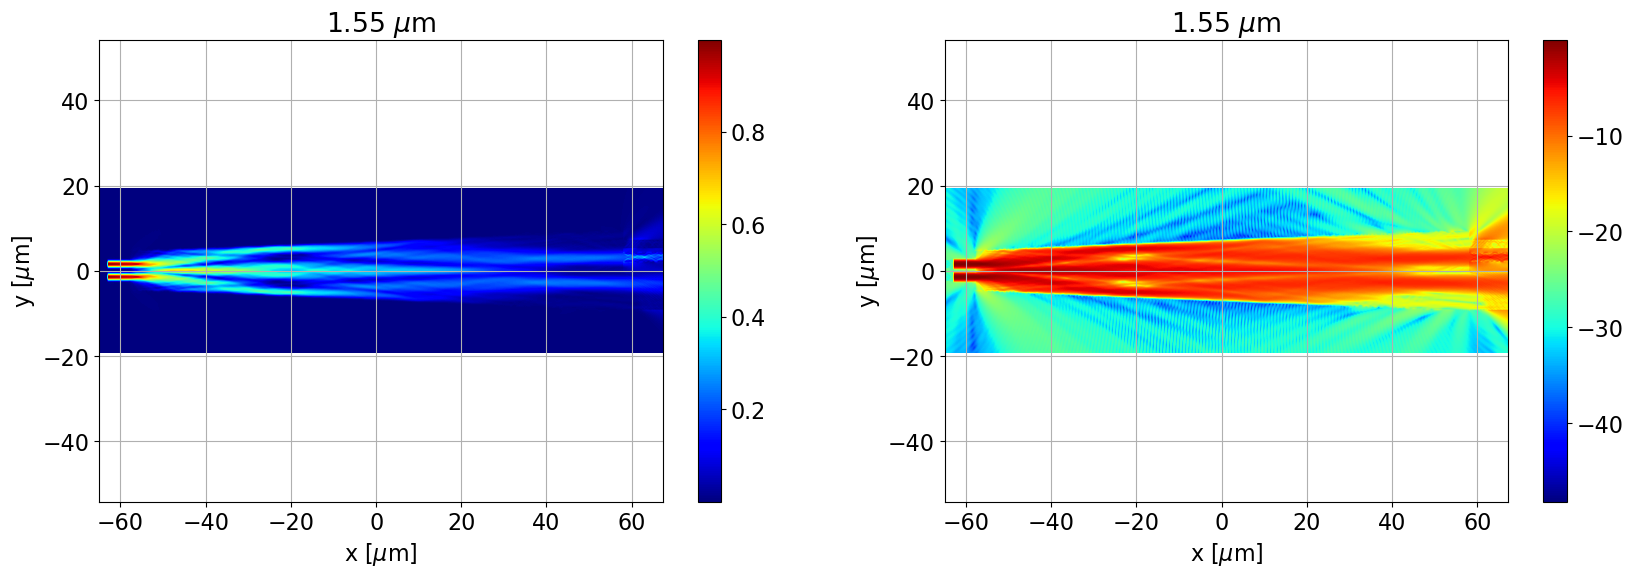

In [7]:
indxLambda = 12
x_efielf = mode.getdata("field", "x")
y_efielf = mode.getdata("field", "y")
lmbd = nu2lambda(mode.getdata("field", "f"))
xmin = 1e6*np.min(x_efielf);
xmax = 1e6*np.max(x_efielf);
ymin = 1e6*np.min(y_efielf);
ymax = 1e6*np.max(y_efielf);

fig1, axs1 = plt.subplots(1,2,figsize=(20,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
axs1[0].set_title(r'%4.2f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.2f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})

In [24]:
simulation_time = (Ldevice + 50e-6)/v
mode.switchtolayout()
mode.select('varFDTD')
mode.set({
    'mesh accuracy':4,
    'x min':-xspan - LS24/2 - 2.5e-6,
    'x max':LS24/2 + LM22 + 5e-6,
    'y':0,
    'y span':45e-6,
    'z':0,
    'z span':zspanfdtd,
    'simulation time': simulation_time,
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
})

mode.setnamed('source up','x',-xspan - LS24/2)
mode.setnamed('source up','y',Wms/6)
mode.setnamed('source down','x',-xspan - LS24/2)
mode.setnamed('source down','y',-Wms/6)

